<a href="https://colab.research.google.com/github/sonhs99/MachineLearning/blob/master/Assignment04/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment04
___

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_train.csv to data_train.csv
Saving data_test.csv to data_test.csv
User uploaded file "data_train.csv" with length 24806 bytes
User uploaded file "data_test.csv" with length 24822 bytes


0. Train by training dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('data_train.csv', newline='') as myfile:
  reader = csv.reader(myfile, delimiter=',')
  train = []
  for i in reader:
    train.append(list(map(float, i)))

with open('data_test.csv', newline='') as myfile:
  reader = csv.reader(myfile, delimiter=',')
  test = []
  for i in reader:
    test.append(list(map(float, i)))

def energy(theta, train):
  sum = 0
  for t in train:
    tmp = theta[0] + theta[1] * t[0] + theta[2] * t[1] + theta[3] * t[2] - t[3]
    sum += tmp * tmp
  return sum/(2*len(train))

In [0]:
train_e = [0]
test_e = [0]
train_theta = [[1, 1, 1, 1]]
alpha = 0.00001

tmp = energy(train_theta[-1], train)
while tmp != train_e[-1]:
  train_e.append(tmp)
  train_theta.append(train_theta[-1].copy())
  for t in train:
    train_theta[-1][0] -= alpha * ( train_theta[-1][0] + train_theta[-1][1]*t[0] + train_theta[-1][2]*t[1] + train_theta[-1][3]*t[2] - t[3] ) / len(train)
    train_theta[-1][1] -= alpha * ( train_theta[-1][0] + train_theta[-1][1]*t[0] + train_theta[-1][2]*t[1] + train_theta[-1][3]*t[2] - t[3] ) * t[0] / len(train)
    train_theta[-1][2] -= alpha * ( train_theta[-1][0] + train_theta[-1][1]*t[0] + train_theta[-1][2]*t[1] + train_theta[-1][3]*t[2] - t[3] ) * t[1] / len(train)
    train_theta[-1][3] -= alpha * ( train_theta[-1][0] + train_theta[-1][1]*t[0] + train_theta[-1][2]*t[1] + train_theta[-1][3]*t[2] - t[3] ) * t[2] / len(train)
  tmp = energy(train_theta[-1], train)
  test_e.append(energy(train_theta[-1], test))

1. Plotting the estimated parameters

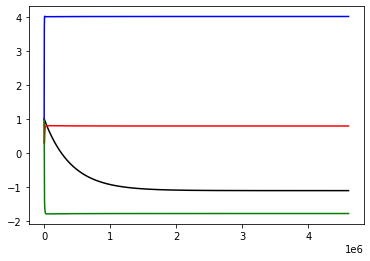

In [5]:
plt.plot(range(0, len(train_theta)), list(t[0] for t in train_theta), color='k')
plt.plot(range(0, len(train_theta)), list(t[1] for t in train_theta), color='r')
plt.plot(range(0, len(train_theta)), list(t[2] for t in train_theta), color='g')  
plt.plot(range(0, len(train_theta)), list(t[3] for t in train_theta), color='b')

plt.show()

2. Plotting the training error

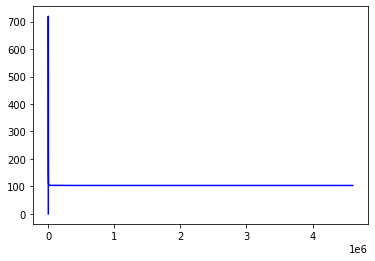

In [6]:
plt.plot(range(0, len(train_e)), train_e, color='b')
plt.show()

3. Plotting the testing error

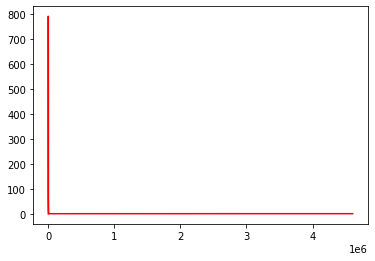

In [8]:
plt.plot(range(0, len(test_e)), test_e, color='r')
plt.show()